<a href="https://colab.research.google.com/github/kevinbui0410/ML4MK/blob/main/Bai_1_Computer_Hardware.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Business Understanding**

Dự đoán giá trị ERP dựa trên các thông tin đã được cung cấp trong file csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Step 2:Data Understanding/Acquire**

Data đã được cung cấp trong file machine.data.txt, gồm 209 dòng và 10 cột.

Thông tin chi tiết các cột:

Attribute Information:

1. vendor name: 30
(adviser, amdahl,apollo, basf, bti, burroughs, c.r.d, cambex, cdc, dec,
dg, formation, four-phase, gould, honeywell, hp, ibm, ipl, magnuson,
microdata, nas, ncr, nixdorf, perkin-elmer, prime, siemens, sperry,
sratus, wang)
2. Model Name: many unique symbols
3. MYCT: machine cycle time in nanoseconds (integer)
4. MMIN: minimum main memory in kilobytes (integer)
5. MMAX: maximum main memory in kilobytes (integer)
6. CACH: cache memory in kilobytes (integer)
7. CHMIN: minimum channels in units (integer)
8. CHMAX: maximum channels in units (integer)
9. PRP: published relative performance (integer)
10. ERP: estimated relative performance from the original article (integer)




**Step 3: Data prepartion/Prepare**

In [ ]:
path = '/content/drive/My Drive/LDS6_Bui_Thanh_Quang/LDS6_Bui_Thanh_Quang_Thi/'

In [ ]:
data = pd.read_csv(path+'data/machine.data.txt',header=None)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       209 non-null    object
 1   1       209 non-null    object
 2   2       209 non-null    int64 
 3   3       209 non-null    int64 
 4   4       209 non-null    int64 
 5   5       209 non-null    int64 
 6   6       209 non-null    int64 
 7   7       209 non-null    int64 
 8   8       209 non-null    int64 
 9   9       209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB


In [ ]:
data.columns=['vendor','model','myct','mmin','mmax','cach','chmin','chmax','prp','erp']

In [ ]:
data.head()

,vendor,model,myct,mmin,mmax,cach,chmin,chmax,prp,erp
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


**Kiểm tra dữ liệu liên quan và xử lý tiền dữ liệu nếu cần thiết**

Đây là bài toán dự đoán 1 giá trị (ERP) dựa trên các giá trị có liên quan, tất cả các cột trong dataset đều có ảnh hưởng đến việc phân loại cột ERP

In [ ]:
# kiểm tra null
data.isnull().sum()

vendor    0
model     0
myct      0
mmin      0
mmax      0
cach      0
chmin     0
chmax     0
prp       0
erp       0
dtype: int64

In [ ]:
data.describe()

,myct,mmin,mmax,cach,chmin,chmax,prp,erp
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


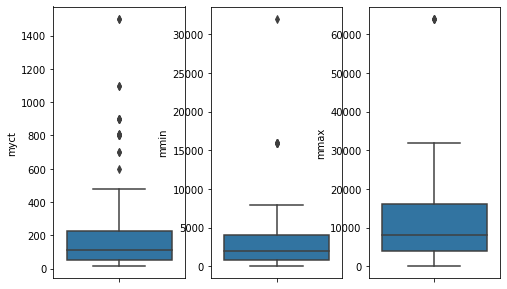

In [ ]:
# phân tích đơn biến, trực quan hóa kiểm tra dữ liệu outlier
plt.figure(figsize=(8,5))
plt.subplot(1,3,1)
sns.boxplot(y=data.myct,orient='v')
plt.subplot(1,3,2)
sns.boxplot(y=data.mmin,orient='v')
plt.subplot(1,3,3)
sns.boxplot(y=data.mmax,orient='v')
plt.show()


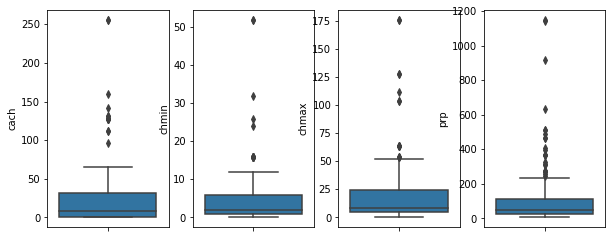

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,4,1)
sns.boxplot(y=data.cach,orient='v')
plt.subplot(1,4,2)
sns.boxplot(y=data.chmin,orient='v')
plt.subplot(1,4,3)
sns.boxplot(y=data.chmax,orient='v')
plt.subplot(1,4,4)
sns.boxplot(y=data.prp,orient='v')

**Tất cả các cột đều xuất hiện outlier, outlier của cột prp là nhiều nhất => giảm outlier cho prp**

In [ ]:
# hạ bậc để giảm outlier cột prp
data.prp = np.log(data.prp)

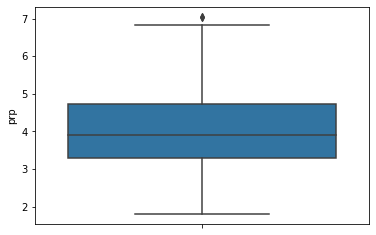

In [ ]:

sns.boxplot(y=data.prp,orient='v')

**Chuyển 2 dữ liệu kiểu chuỗi về dữ liệu kiểu số**


In [ ]:
data['vendor'].value_counts()

ibm             32
nas             19
honeywell       13
ncr             13
sperry          13
siemens         12
amdahl           9
cdc              9
burroughs        8
dg               7
harris           7
hp               7
magnuson         6
c.r.d            6
ipl              6
dec              6
cambex           5
formation        5
prime            5
gould            3
nixdorf          3
perkin-elmer     3
bti              2
basf             2
wang             2
apollo           2
sratus           1
four-phase       1
adviser          1
microdata        1
Name: vendor, dtype: int64

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
data["vendor_num"] = ord_enc.fit_transform(data[["vendor"]])
data.tail()

,vendor,model,myct,mmin,mmax,cach,chmin,chmax,prp,erp,vendor_num
204,sperry,80/8,124,1000,8000,0,1,8,3.737670,37,27.0
205,sperry,90/80-model-3,98,1000,8000,32,2,8,3.828641,50,27.0
206,sratus,32,125,2000,8000,0,2,14,3.951244,41,28.0
207,wang,vs-100,480,512,8000,32,0,0,4.204693,47,29.0
208,wang,vs-90,480,1000,4000,0,0,0,3.806662,25,29.0


In [ ]:
data['model'].value_counts()

omega:480-iii     1
1100/83           1
v8545:ii          1
as/8040           1
as/9000-n         1
                 ..
8890/70           1
v8670             1
decsys:10:1091    1
1100/84           1
700               1
Name: model, Length: 209, dtype: int64

In [ ]:
data["model_num"] = ord_enc.fit_transform(data[["model"]])
data.tail()

,vendor,model,myct,mmin,mmax,cach,chmin,chmax,prp,erp,vendor_num,model_num
204,sperry,80/8,124,1000,8000,0,1,8,3.737670,37,27.0,100.0
205,sperry,90/80-model-3,98,1000,8000,32,2,8,3.828641,50,27.0,109.0
206,sratus,32,125,2000,8000,0,2,14,3.951244,41,28.0,28.0
207,wang,vs-100,480,512,8000,32,0,0,4.204693,47,29.0,207.0
208,wang,vs-90,480,1000,4000,0,0,0,3.806662,25,29.0,208.0


**Đây là bài toán dự đoán giá trị từ các giá trị cho trước => áp dụng thuật toán Linear Regression**

In [ ]:
X = data.drop(['erp','model','vendor'],axis=1)
y = data.erp

In [ ]:
X.shape

(209, 9)

In [ ]:
y.shape

(209,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
intercept = model.intercept_
slope = model.coef_
print(intercept)
print(slope)

48.57294886045996
[ 3.47707794e-02  8.41193997e-03  8.79430702e-03  1.09510415e+00
 -1.39081431e+00  1.16076682e+00 -2.88099404e+01  1.13645883e-01
 -1.00794073e-01]


In [ ]:
print(model.score(X,y))
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.9080112914157643
0.9297090643417683
0.8746332716753586


**Điểm score cao, trên 85%**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('MSE = ',mean_squared_error(y_pred, y_test))
print('MAE = ',mean_absolute_error(y_pred, y_test))

MSE =  3949.0553535657514
MAE =  34.96413238480626


In [ ]:
y_pred

array([ 1.09933563e+02,  1.55835091e+02,  6.31569598e+01,  1.54119206e+02,
        1.05248961e+02,  3.28545909e+01,  6.55304777e+00,  8.40811411e+02,
        1.04164816e+01,  1.75461665e+02,  4.97563938e+01,  2.53122375e+02,
       -1.84870652e+01, -2.78099894e-01,  1.08106653e+02,  2.18980340e+02,
        1.11747687e+02,  7.77100447e+01,  3.59232694e+02,  9.56526667e+01,
        3.46964050e+02,  1.01025441e+02, -1.96230647e+01,  3.74764804e+02,
        1.01680295e+02,  1.24056873e+01, -2.69586147e+00,  1.72380346e+01,
        1.57343538e+02,  4.34173625e+01,  4.22351308e+00,  1.36676459e+01,
        2.82378118e+02,  8.84214646e+01,  5.18358424e+01, -6.61634154e+00,
        2.48532343e+01,  1.83107488e+02, -8.14454881e+00,  1.22300898e+02,
        5.61448893e+02,  5.48029022e+00,  3.04842254e+02,  1.28278562e+01,
        1.93771799e+01, -2.50782011e+01,  3.05201269e+02,  4.43621562e+01,
        3.08291685e+02,  8.70615095e+01,  6.46748378e+01,  1.02173861e+02,
        3.66593762e+02,  

In [ ]:
y_test

134     80
35     136
81      30
147    119
42      74
      ... 
205     50
102     18
34     138
78      18
53      36
Name: erp, Length: 63, dtype: int64

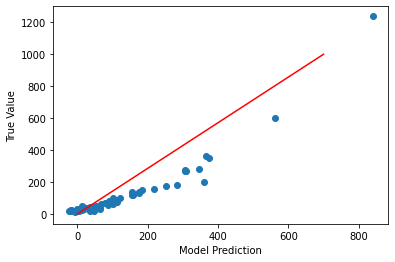

In [ ]:
plt.scatter(y_pred, y_test)
plt.xlabel('Model Prediction')
plt.ylabel('True Value')
plt.plot([0,700],[0,1000],'k-',color='r')
plt.show()

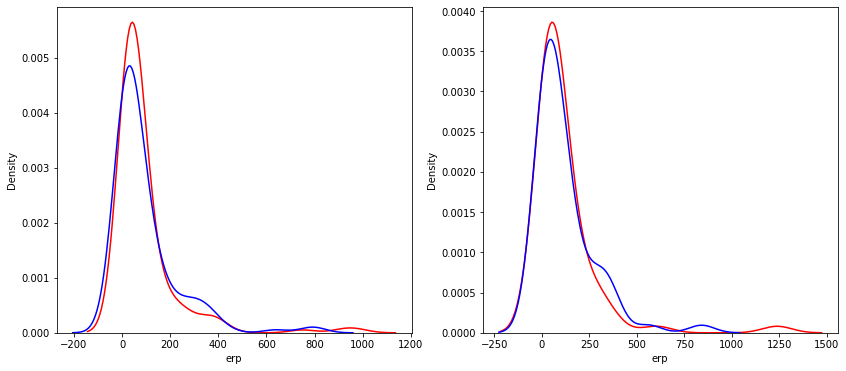

In [ ]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax1 = sns.distplot(y_train, hist=False, color='r', label='Actual Train Values')
sns.distplot(model.predict(X_train), hist=False, color='b', label='Predicted Train Values', ax=ax1)
plt.subplot(1,2,2)
ax2 = sns.distplot(y_test, hist=False, color='r', label='Actual Test Values')
sns.distplot(y_pred, hist=False, color='b', label='Predicted Train Values', ax=ax2)

**Biểu đồ 1 và 2 đều cho thấy phân phối của biểu đồ 1 tốt hơn => model cho kết quả tốt hơn đối với dữa liệu train, đối với dữ liệu test, data bị sai lệch trong khoảng từ 200 đến 400**

**Lựa chọn thuộc tính**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

bestfeatures = SelectKBest(score_func=f_regression, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores], axis=1)
featureScores.columns = ['Specs','Score']

featureScores.sort_values('Score', ascending=False, inplace=True)
print(featureScores)

    Specs       Score
4    mmax  895.035239
3    mmin  422.636024
8     prp  259.585993
5    cach  150.332889
6   chmin  123.042584
7   chmax  111.779441
2    myct   18.778451
1   model    7.027754
0  vendor    0.085516


In [ ]:
corrmat = data.corr()
top_corr_features = corrmat.index

In [ ]:
corrmat

,vendor,model,myct,mmin,mmax,cach,chmin,chmax,prp,erp
vendor,1.000000,-0.127345,-0.080296,-0.083438,0.008180,0.005729,0.037202,-0.012555,-0.036779,-0.020321
model,-0.127345,1.000000,0.048600,-0.126972,-0.176645,-0.035492,-0.218127,-0.154152,-0.144549,-0.181206
myct,-0.080296,0.048600,1.000000,-0.335642,-0.378561,-0.321000,-0.301090,-0.250502,-0.532259,-0.288396
mmin,-0.083438,-0.126972,-0.335642,1.000000,0.758157,0.534729,0.517189,0.266907,0.715635,0.819292
mmax,0.008180,-0.176645,-0.378561,0.758157,1.000000,0.537990,0.560513,0.527246,0.820035,0.901202
cach,0.005729,-0.035492,-0.321000,0.534729,0.537990,1.000000,0.582245,0.487846,0.703894,0.648620
chmin,0.037202,-0.218127,-0.301090,0.517189,0.560513,0.582245,1.000000,0.548281,0.602493,0.610580
chmax,-0.012555,-0.154152,-0.250502,0.266907,0.527246,0.487846,0.548281,1.000000,0.505481,0.592156
prp,-0.036779,-0.144549,-0.532259,0.715635,0.820035,0.703894,0.602493,0.505481,1.000000,0.745890
erp,-0.020321,-0.181206,-0.288396,0.819292,0.901202,0.648620,0.610580,0.592156,0.745890,1.000000


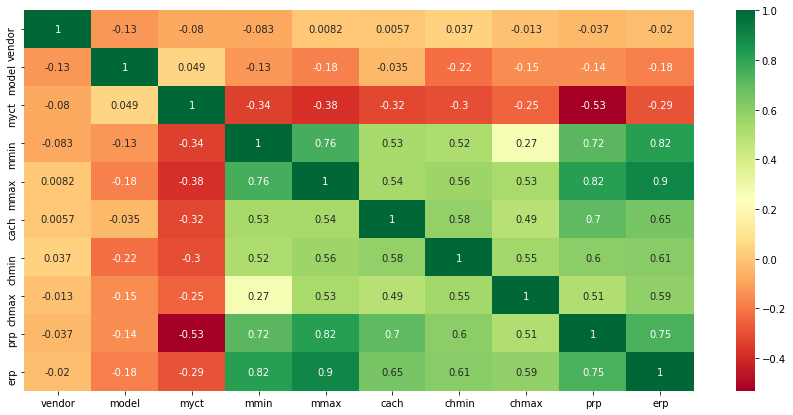

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(data[top_corr_features].corr(),cmap='RdYlGn',annot=True)
plt.show()

**Dựa vào score và biểu đồ nhiệt, lựa chọn 6 thuộc tính để thực hiện lại model**

mmax  895.035239

mmin  422.636024

prp  259.585993

cach  150.332889

chmin  123.042584

chmax  111.779441

In [ ]:
X_1 = data.drop(['erp','model','vendor','myct','model_num','vendor_num'],axis=1)
y_1 = data.erp

In [ ]:
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1,y_1,test_size=0.3)

In [ ]:
from sklearn.linear_model import LinearRegression
model_1 = LinearRegression()
model_1.fit(X_train_1, y_train_1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred_1 = model_1.predict(X_test_1)

In [ ]:
intercept = model_1.intercept_
slope = model_1.coef_
print(intercept)
print(slope)

100.79602038269391
[ 1.65761166e-02  7.85371437e-03  9.95999955e-01 -7.16206164e-01
  1.62174810e+00 -4.78675795e+01]


In [ ]:
print(model_1.score(X_1,y_1))
print(model_1.score(X_train_1,y_train_1))
print(model_1.score(X_test_1,y_test_1))

0.9173770704023803
0.9273201154532087
0.8634242729216773


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('MSE = ',mean_squared_error(y_pred_1, y_test_1))
print('MAE = ',mean_absolute_error(y_pred_1, y_test_1))

MSE =  1770.2976713444793
MAE =  28.61011594184665


**Điểm score nhìn chung không thay đổi, điểm MSE giảm được 1 phần**

**Dự đoán kết quả**

In [ ]:
data['vendor']

0      adviser
1       amdahl
2       amdahl
3       amdahl
4       amdahl
        ...   
204     sperry
205     sperry
206     sratus
207       wang
208       wang
Name: vendor, Length: 209, dtype: object

In [ ]:
X_new = [['amdahl','470v/7b',29,8000,320000,32,8,32,172],
         ['sperry','1100/83',50,2000,32000,112,52,104,307]]
enc_vendor = ord_enc.fit(data[["vendor"]])
amd = enc_vendor.transform([['amdahl']])
amd, sperry = enc_vendor.transform([['amdahl']]), enc_vendor.transform([['sperry']])
enc_model = ord_enc.fit(data[["model"]])
model1,model2 = enc_model.transform([['470v/7b']]),enc_vendor.transform([['1100/83']])
X_new = [[amd,model1,29,8000,320000,32,8,32,172],
         [sperry,model2,50,2000,32000,112,52,104,307]]
y_new = model.predict(X_new)
y_new

array([-436457.38000909,  -43653.10015364])